In [1]:
from data_preprocessing.DataLoader import DataLoader

In [2]:
d = DataLoader.load_data_from_path("data")

In [3]:
products = d.products

In [4]:
products

,product_id,product_name,category_path,price
0,1001,Telefon Siemens Gigaset DA310,Telefony i akcesoria;Telefony stacjonarne,58.97
1,1002,Kyocera FS-1135MFP,Komputery;Drukarki i skanery;Biurowe urządzeni...,2048.50
2,1003,Kyocera FS-3640MFP,Komputery;Drukarki i skanery;Biurowe urządzeni...,7639.00
3,1004,Fallout 3 (Xbox 360),Gry i konsole;Gry na konsole;Gry Xbox 360,49.99
4,1005,Szalone Króliki Na żywo i w kolorze (Xbox 360),Gry i konsole;Gry na konsole;Gry Xbox 360,-49.99
...,...,...,...,...
314,1315,Jabra Talk,Telefony i akcesoria;Akcesoria telefoniczne;Ze...,54.99
315,1316,Plantronics Voyager Legend,Telefony i akcesoria;Akcesoria telefoniczne;Ze...,249.00
316,1317,Plantronics Savi W740,Telefony i akcesoria;Akcesoria telefoniczne;Ze...,1303.96
317,1318,Plantronics Savi W710,Sprzęt RTV;Audio;Słuchawki,553.00


In [5]:
products.dtypes

product_id         int64
product_name      object
category_path     object
price            float64
dtype: object

In [6]:
products.describe()

,product_id,price
count,319.000000,3.190000e+02
mean,1160.000000,4.326188e+06
std,92.231593,4.010396e+07
min,1001.000000,-7.990000e+02
25%,1080.500000,2.494500e+01
50%,1160.000000,4.990000e+01
75%,1239.500000,1.126350e+02
max,1319.000000,6.887800e+08


In [7]:
deliveries = d.deliveries

In [8]:
deliveries

,purchase_id,purchase_timestamp,delivery_timestamp,delivery_company
0,20001,2021-02-16 22:56:36,2021-02-21 00:39:10.536911,360.0
1,20002,2021-02-24 00:56:14,2021-02-27 14:05:55.281323,360.0
2,20003,2021-03-15 03:08:10,NaT,620.0
3,20004,2021-03-10 21:08:11,NaT,516.0
4,20005,2021-01-04 08:12:08,2021-01-03 05:46:20.558336,620.0
...,...,...,...,...
7035,27036,2021-01-13 23:58:40,2021-01-18 11:55:22.010087,516.0
7036,27037,2021-01-14 03:48:43,2021-01-16 15:59:29.566011,620.0
7037,27038,2021-02-25 12:52:33,2021-02-26 01:49:17.857426,516.0
7038,27039,2021-01-07 15:36:47,2021-01-05 12:16:35.844528,360.0


In [9]:
deliveries.dtypes

purchase_id                    int64
purchase_timestamp    datetime64[ns]
delivery_timestamp    datetime64[ns]
delivery_company             float64
dtype: object

In [15]:
deltas =  deliveries.delivery_timestamp - deliveries.purchase_timestamp 

In [20]:
deltas_clean = deltas.dropna()

In [34]:
import pandas as pd

In [38]:
deltas_clean

0        4 days 01:42:34.536911
1        3 days 13:09:41.281323
4      -2 days +21:34:12.558336
5        3 days 18:44:40.044368
6        0 days 08:48:38.427193
                 ...           
7035     4 days 11:56:42.010087
7036     2 days 12:10:46.566011
7037     0 days 12:56:44.857426
7038   -3 days +20:39:48.844528
7039   -1 days +15:20:47.532694
Length: 6672, dtype: timedelta64[ns]

In [43]:
deltas_clean_abs = deltas_clean.abs()

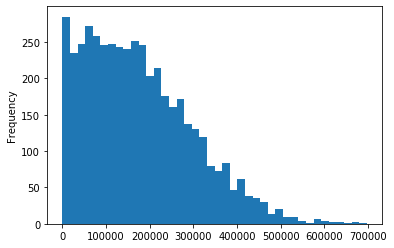

In [54]:
deltas_clean[deltas_clean>pd.Timedelta(0)].astype('timedelta64[s]').plot.hist(bins = 40)

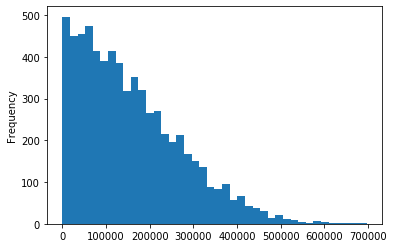

In [55]:
deltas_clean_abs.astype('timedelta64[s]').plot.hist(bins = 40)

In [71]:
deliveries["deltas"] = deltas.astype('timedelta64[s]')

In [72]:
deliveries_clean = deliveries.dropna()

In [87]:
import numpy as np

In [88]:
deliveries_clean.groupby("delivery_company")["deltas"].agg([np.mean,np.std])

,mean,std
delivery_company,,
360.0,85637.756509,177363.292190
516.0,88316.052880,174615.846859
620.0,86541.996258,172254.647796


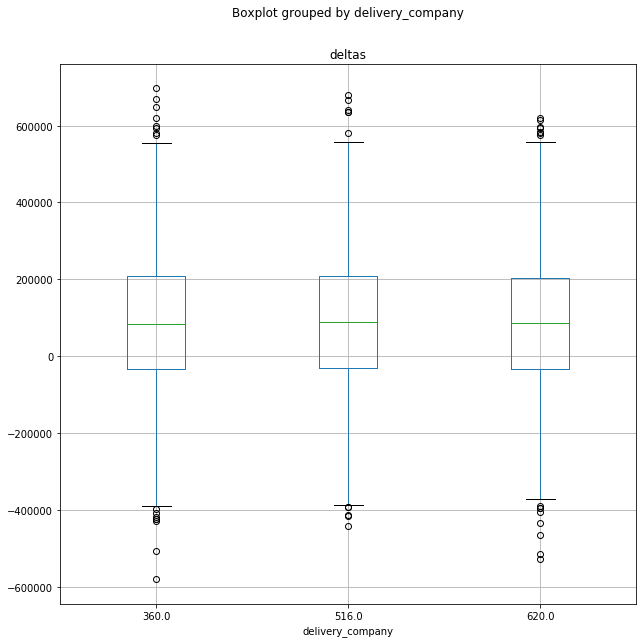

In [79]:
deliveries_clean.boxplot(column="deltas",by='delivery_company',figsize=(10,10))

In [11]:
deliveries.describe()

,purchase_id,delivery_company
count,7040.00000,6687.000000
mean,23520.50000,500.253028
std,2032.41728,106.626291
min,20001.00000,360.000000
25%,21760.75000,360.000000
50%,23520.50000,516.000000
75%,25280.25000,620.000000
max,27040.00000,620.000000
